# Tutorial 61: nx-Graph

This example demonstrates how to use the SIR_3S_to_nx_graph() of the SIR 3S Toolkit to generate a nx-Graph based on a SIR 3S model.

# SIR 3S Installation

In [1]:
SIR3S_SIRGRAF_DIR = r"C:\3S\SIR 3S\SirGraf-90-15-00-20x64_Quebec-Upd1" #change to local path

# Imports

Note: The SIR 3S Toolkit requires the Sir3S_Toolkit.dll included in SIR 3S installations (version Quebec and higher).

In [2]:
import sir3stoolkit

The core of sir3stoolkit is a Python wrapper around basic functionality of SIR 3S, offering a low-level access to the creation, modification and simulation of SIR 3S models. In the future pure python subpackages may be added.

In [3]:
from sir3stoolkit.core import wrapper

In [4]:
from sir3stoolkit.mantle.alternative_models import SIR3S_Model_Alternative_Models

In [5]:
sir3stoolkit

<module 'sir3stoolkit' from 'C:\\Users\\aUsername\\3S\\sir3stoolkit\\src\\sir3stoolkit\\__init__.py'>

The wrapper package has to be initialized with reference to a SIR 3S (SirGraf) installation.

In [6]:
wrapper.Initialize_Toolkit(SIR3S_SIRGRAF_DIR)

### Additional imports

In [7]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import logging

# Initialization

In [8]:
s3s = SIR3S_Model_Alternative_Models()

Initialization complete


# Open Model

In [9]:
dbFilePath=r"C:\Users\aUsername\3S\PT3S\PT3S\Examples\Example5.db3"

In [10]:
s3s.OpenModel(dbName=dbFilePath,
              providerType=s3s.ProviderTypes.SQLite,
              Mid="M-1-0-1",
              saveCurrentlyOpenModel=False,
              namedInstance="",
              userID="",
              password="")

Model is open for further operation


# Generate nx Graph

We can use the [SIR_3S_to_nx_graph()](https://3sconsult.github.io/sir3stoolkit/references/sir3stoolkit.mantle.html#sir3stoolkit.mantle.alternative_models.Alternative_Models_SIR3S_Model.SIR_3S_to_nx_graph) method to create a nx graph representing a SIR 3S model.

In [11]:
logging.disable(logging.INFO)

In [12]:
G=s3s.SIR_3S_to_nx_graph()

[2026-01-09 15:36:49,992] WARNING in sir3stoolkit.mantle.dataframes: [model_data] Spatial Reference Identifier (SRID) not defined in model. DataFrame cannot be transformed to GeoDataFrame but geometry column can be created independently of SRID. Returning regular DataFrame with a geometry column.
[2026-01-09 15:36:50,873] WARNING in sir3stoolkit.mantle.dataframes: [model_data] Spatial Reference Identifier (SRID) not defined in model. DataFrame cannot be transformed to GeoDataFrame but geometry column can be created independently of SRID. Returning regular DataFrame with a geometry column.
[2026-01-09 15:36:51,500] WARNING in sir3stoolkit.mantle.dataframes: [model_data] Spatial Reference Identifier (SRID) not defined in model. DataFrame cannot be transformed to GeoDataFrame but geometry column can be created independently of SRID. Returning regular DataFrame with a geometry column.
[2026-01-09 15:36:51,527] WARNING in sir3stoolkit.mantle.dataframes: [model_data] Spatial Reference Identi

In [13]:
logging.disable(logging.NOTSET)

# View generated Graph

As you can see below the graph does not contain any additional properties or result values. 

## Node and Edge Attributes

In [14]:
node_attrs = {n: data for n, data in G.nodes(data=True)}

In [15]:
node_attrs['4680103632661687203']

{'tk': '4680103632661687203',
 'Fkcont': '5478326535335532120',
 'geometry': <POINT (55176.324 98780.495)>}

In [16]:
edge_attrs = {(u, v): data for u, v, data in G.edges(data=True)}

In [17]:
edge_attrs['4680103632661687203', '5432609004919372061']

{'tk': '5460759352148475007',
 'Fkcont': '5478326535335532120',
 'geometry': <LINESTRING (55176.324 98780.495, 55231.478 98824.335)>,
 'fkKI': '4680103632661687203',
 'fkKK': '5432609004919372061',
 'element type': 'Pipe'}

## Connected ?

In [18]:
nx.is_weakly_connected(G) # Is connected as an undirected graph

True

## Plot

In [19]:
def plot_nx_graph(G, main_container):
    # Extract node positions from geometry and filter by Fkcont
    pos = {
        node_id: (data['geometry'].x, data['geometry'].y)
        for node_id, data in G.nodes(data=True)
        if 'geometry' in data and hasattr(data['geometry'], 'x') and hasattr(data['geometry'], 'y')
        and data.get('Fkcont') == main_container
    }

    # Extract edges with valid geometry and both nodes in pos
    edges = [
        (u, v, data) for u, v, data in G.edges(data=True)
        if u in pos and v in pos and 'geometry' in data and data['geometry'].geom_type != 'Point'
    ]

    # Plot
    plt.figure(figsize=(20, 14))
    for _, _, data in edges:
        geom = data['geometry']
        x, y = geom.xy
        plt.plot(x, y, color='black', linewidth=1)

    # Only draw nodes that have positions
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(pos.keys()), node_color='black', node_size=10)
    plt.title(f"nx-Graph'{main_container}'")
    plt.axis('equal')
    plt.show()

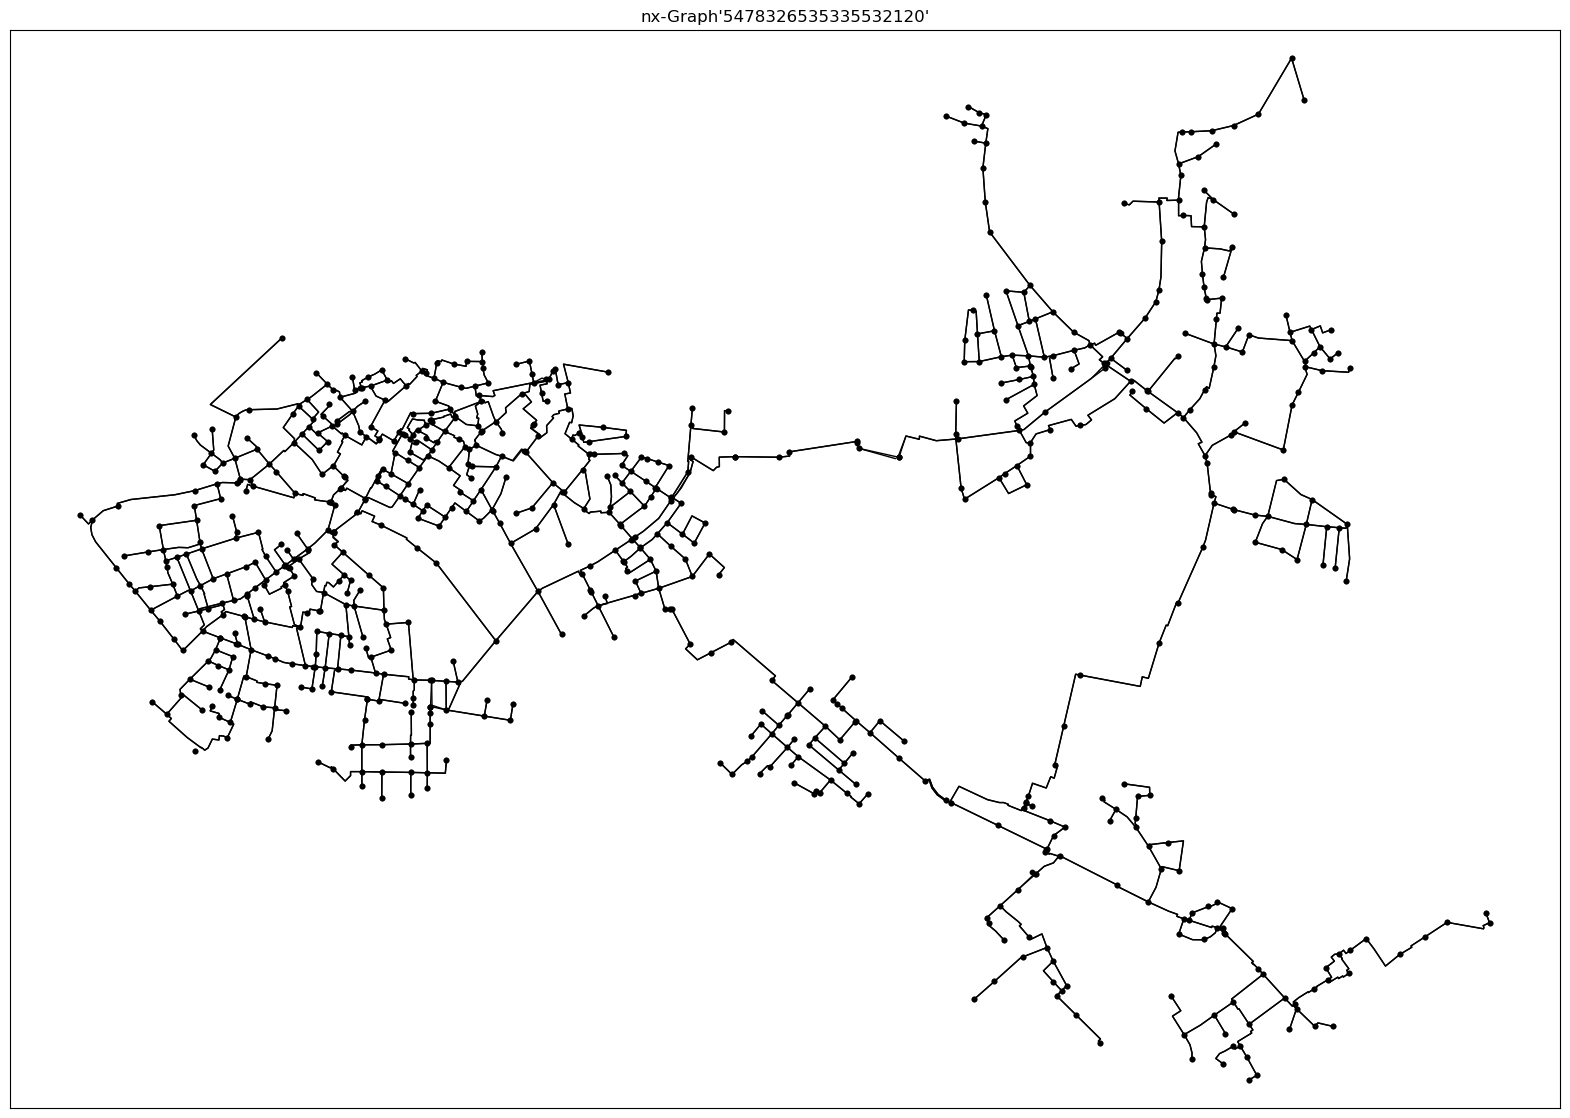

In [20]:
plot_nx_graph(G, s3s.GetMainContainer()[0])

# Add properities to graph

Now, we can model data properties and result properties to the nodes and edges.

In [21]:
props_to_add = ["Kvr", "T", "BCIND"]  
G = s3s.add_properties_to_graph(
    G=G,
    element_type="Node",
    properties=props_to_add,
)

[2026-01-09 15:36:56,770] INFO in sir3stoolkit.mantle.alternative_models: [graph] Enriching graph with properties for element_type='Node'
[2026-01-09 15:36:56,777] INFO in sir3stoolkit.mantle.alternative_models: [graph] Using 1 model_data props and 2 result props.
[2026-01-09 15:36:56,783] INFO in sir3stoolkit.mantle.dataframes: [model_data] Generating model_data dataframe for element type: ObjectTypes.Node
[2026-01-09 15:36:56,791] INFO in sir3stoolkit.mantle.dataframes: [model_data] Retrieved 1559 element(s) of element type ObjectTypes.Node.
[2026-01-09 15:36:56,795] INFO in sir3stoolkit.mantle.dataframes: [Resolving model_data Properties] Using 1 model_data properties.
[2026-01-09 15:36:56,796] INFO in sir3stoolkit.mantle.dataframes: [model_data] Retrieving model_data properties ['Kvr']...
[2026-01-09 15:36:57,033] INFO in sir3stoolkit.mantle.dataframes: [model_data] Done. Shape: (1559, 2)
[2026-01-09 15:36:57,689] INFO in sir3stoolkit.mantle.dataframes: [results] Generating results

In [22]:
node_attrs = {n: data for n, data in G.nodes(data=True)}

In [23]:
node_attrs['4680103632661687203']

{'tk': '4680103632661687203',
 'Fkcont': '5478326535335532120',
 'geometry': <POINT (55176.324 98780.495)>,
 'Kvr': '1',
 'T': 125.03,
 'BCIND': 17.0}

In [24]:
props_to_add = ["DN", "L", "JV", "PHR"]  
G = s3s.add_properties_to_graph(
    G=G,
    element_type="Pipe",
    properties=props_to_add,
)

[2026-01-09 15:36:59,741] INFO in sir3stoolkit.mantle.alternative_models: [graph] Enriching graph with properties for element_type='Pipe'
[2026-01-09 15:36:59,746] INFO in sir3stoolkit.mantle.alternative_models: [graph] Using 2 model_data props and 2 result props.
[2026-01-09 15:36:59,754] INFO in sir3stoolkit.mantle.dataframes: [model_data] Generating model_data dataframe for element type: ObjectTypes.Pipe
[2026-01-09 15:36:59,763] INFO in sir3stoolkit.mantle.dataframes: [model_data] Retrieved 1672 element(s) of element type ObjectTypes.Pipe.
[2026-01-09 15:36:59,766] INFO in sir3stoolkit.mantle.dataframes: [Resolving model_data Properties] Using 2 model_data properties.
[2026-01-09 15:36:59,768] INFO in sir3stoolkit.mantle.dataframes: [model_data] Retrieving model_data properties ['DN', 'L']...
[2026-01-09 15:37:00,533] INFO in sir3stoolkit.mantle.dataframes: [model_data] Done. Shape: (1672, 3)
[2026-01-09 15:37:01,023] INFO in sir3stoolkit.mantle.dataframes: [results] Generating res

In [25]:
edge_attrs = {(u, v): data for u, v, data in G.edges(data=True)}

In [26]:
edge_attrs['4680103632661687203', '5432609004919372061']

{'tk': '5460759352148475007',
 'Fkcont': '5478326535335532120',
 'geometry': <LINESTRING (55176.324 98780.495, 55231.478 98824.335)>,
 'fkKI': '4680103632661687203',
 'fkKK': '5432609004919372061',
 'element type': 'Pipe',
 'DN': '125',
 'L': '75',
 'JV': 0.04940455,
 'PHR': 0.003705341}